<a href="https://colab.research.google.com/github/Foofdof/ML/blob/main/KNNBooks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv("books.csv", on_bad_lines='skip')

In [ ]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,rating_between
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,5
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,5
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,5
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,5
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,5


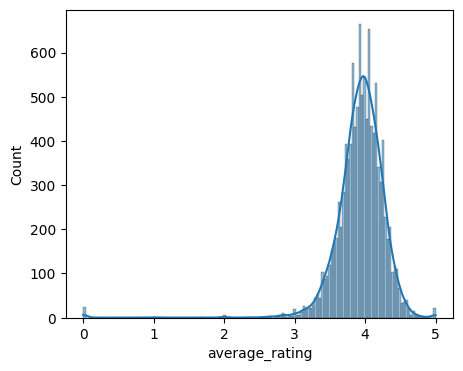

In [ ]:
fig, ax = plt.subplots(figsize = (5,4))
sns.histplot(df["average_rating"], ax=ax, kde = True)
df2 = df.copy()
df2.loc[(df['average_rating'] >= 0) & (df['average_rating'] <= 1), "rating_between"] = "1"
df2.loc[(df['average_rating'] >= 1) & (df['average_rating'] <= 2), "rating_between"] = "2"
df2.loc[(df['average_rating'] >= 2) & (df['average_rating'] <= 3), "rating_between"] = "3"
df2.loc[(df['average_rating'] >= 3) & (df['average_rating'] <= 4), "rating_between"] = "4"
df2.loc[(df['average_rating'] >= 4) & (df['average_rating'] <= 5), "rating_between"] = "5"
df2.head()


In [ ]:
rating_df = pd.get_dummies(df2["rating_between"])
language_df = pd.get_dummies(df2["language_code"])
rating_df.head()

,1,2,3,4,5
0,False,False,False,False,True
1,False,False,False,False,True
2,False,False,False,False,True
3,False,False,False,False,True
4,False,False,False,False,True


In [ ]:
features = pd.concat([rating_df, language_df, df2['average_rating'], df2['ratings_count']], axis=1)
rating_df = pd.get_dummies(df2["rating_between"])
language_df = pd.get_dummies(df2["language_code"])
rating_df.head()

,1,2,3,4,5
0,False,False,False,False,True
1,False,False,False,False,True
2,False,False,False,False,True
3,False,False,False,False,True
4,False,False,False,False,True


In [ ]:
from sklearn.neighbors import NearestNeighbors

features = pd.concat([rating_df, language_df, df2['average_rating'], df2['ratings_count']], axis=1)
features = MinMaxScaler().fit_transform(features)
model = NearestNeighbors(n_neighbors=5)
model.fit(features)
dist, idlist= model.kneighbors(features)

In [ ]:
def BookRecomender(book_name):
    book_list_name = []
    book_id = df2[df2["title"] == book_name].index
    book_id = book_id[0]
    for newid in idlist[book_id]:
        book_list_name.append(df2.loc[newid].title)
    return book_list_name

df["title"][5]

'Unauthorized Harry Potter Book Seven News: "Half-Blood Prince" Analysis and Speculation'

In [ ]:
book_names = BookRecomender(df["title"][5])

In [ ]:
book_names

['Unauthorized Harry Potter Book Seven News: "Half-Blood Prince" Analysis and Speculation',
 'Night Beat: A Shadow History of Rock & Roll',
 'Ten Great Works of Philosophy',
 'Historical Metaphors and Mythical Realities: Structure in the Early History of the Sandwich Islands Kingdom',
 'A Three Dog Life']